In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip.extractall('/content')
zip.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train' ,
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size = (256,256)
)

validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test' ,
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize Pixel Value to fall in range of 0 - 1
def preprocess(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_data = train_data.map(preprocess)
validation_data = validation_data.map(preprocess)

In [ ]:
# Create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
# Compile Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,epochs=10,validation_data=validation_data)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.4043 - accuracy: 0.5637 - val_loss: 0.7482 - val_accuracy: 0.5586
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6447 - accuracy: 0.6403 - val_loss: 0.7154 - val_accuracy: 0.6686
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5720 - accuracy: 0.7028 - val_loss: 0.6407 - val_accuracy: 0.6896
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5045 - accuracy: 0.7517 - val_loss: 0.6266 - val_accuracy: 0.7322
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4483 - accuracy: 0.7868 - val_loss: 0.5488 - val_accuracy: 0.7628
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3973 - accuracy: 0.8159 - val_loss: 0.4821 - val_accuracy: 0.7708
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3324 - accuracy: 0.8528 - val_loss: 0.6222 - val_ac

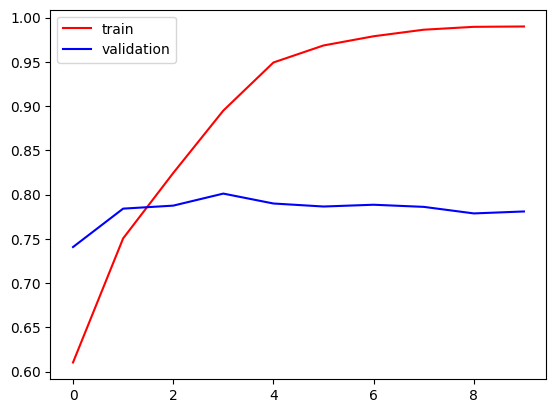

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

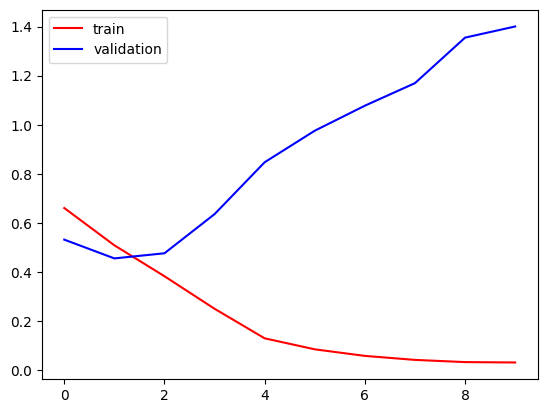

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

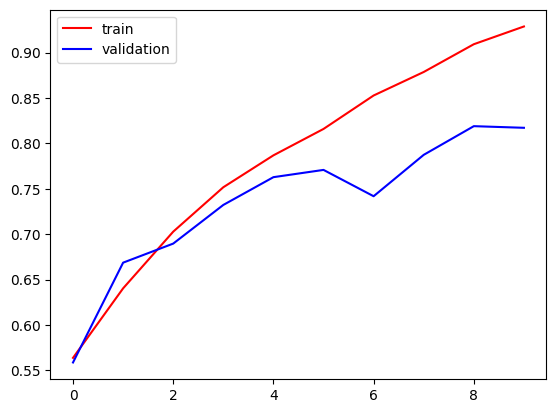

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

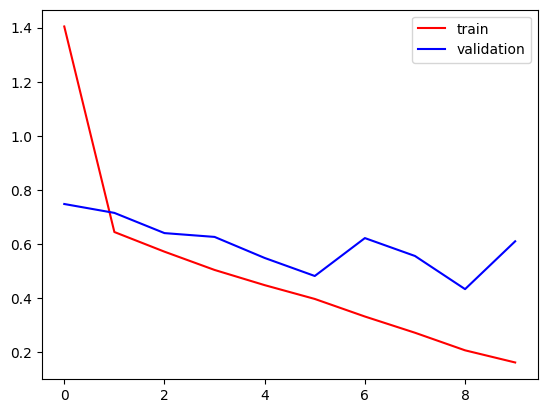

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog_image.jpeg')

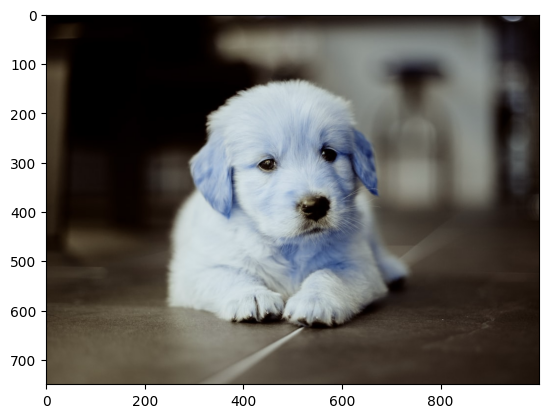

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(750, 1000, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 408ms/step


array([[1.]], dtype=float32)